In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Since You can see Status and Unnamed 1 columns has no non-null values so we will remove them

In [6]:
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


Now we will check which column has how much null values

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Now we can see Amount has the most Null Values. SO we have to remove rows which has null values in Amount Column

In [9]:
df.shape

(11251, 13)

In [10]:
#removing null Amount Rows
df.dropna(inplace=True)

inplace is used to save the changes made in the dataframe

In [11]:
df.shape

(11239, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [13]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
#changing the data type of amount to int
df['Amount'] = df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int32')

# Exploratory Data Analysis

**Gender**

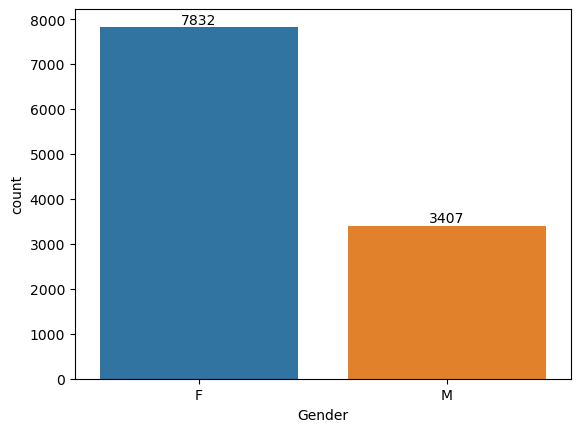

In [16]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

**Calculating how much amount spent by People on the basis of Gender**

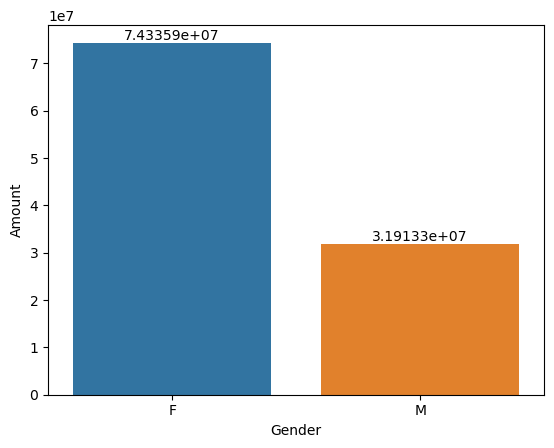

In [17]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
xy = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
for bars in xy.containers:
    xy.bar_label(bars)

In [18]:
sales_gen.head()

,Gender,Amount
0,F,74335853
1,M,31913276


**With the above sufficient data it can be proved that women spend more than men and even have purchasing power more than men**

**Age**

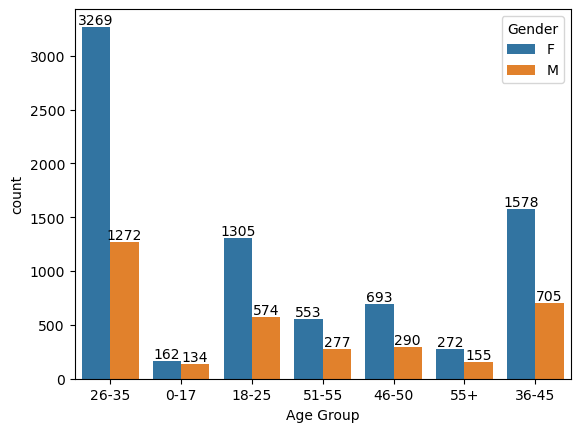

In [19]:
age = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bars in age.containers:
    age.bar_label(bars)

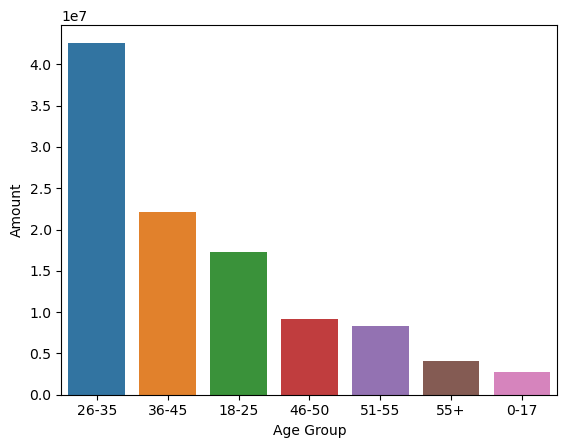

In [20]:
sales_gen_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
xy_age = sns.barplot(x = 'Age Group', y = 'Amount', data = sales_gen_age)

In [21]:
sales_gen_age.head()

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477


**From the above graph it can be seen that 26-35 age group has spent the most**

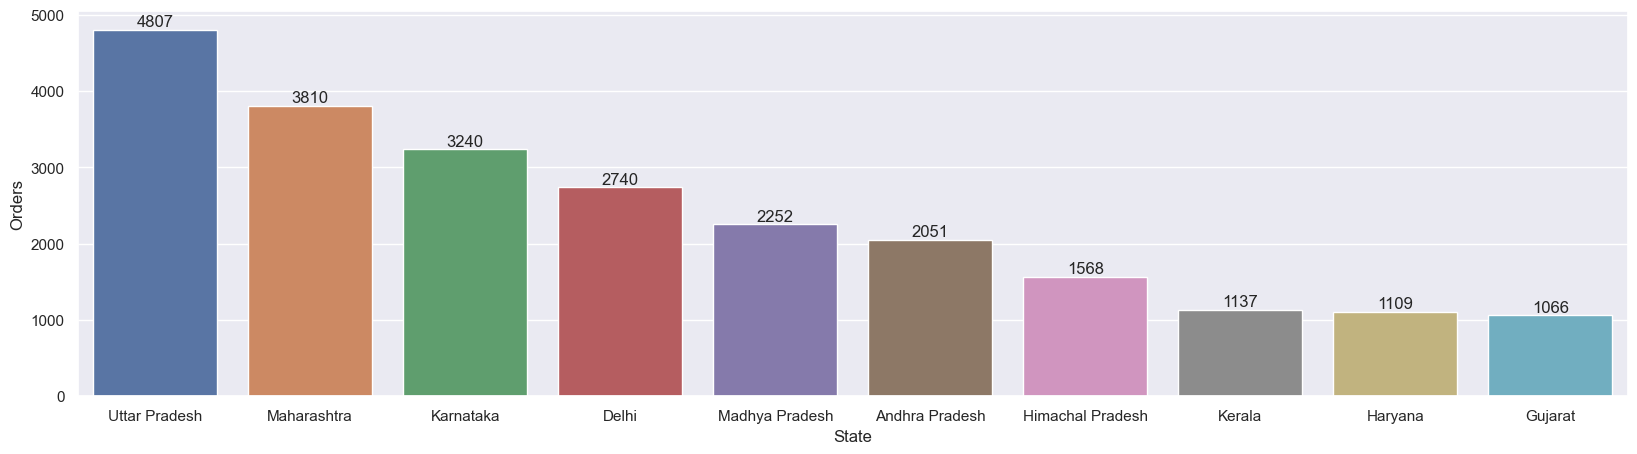

In [22]:
#total number of orders from top 10 states
orders_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
orders_state_graph = sns.barplot(x = 'State', y = 'Orders', data = orders_state)
for bars in orders_state_graph.containers:
    orders_state_graph.bar_label(bars)

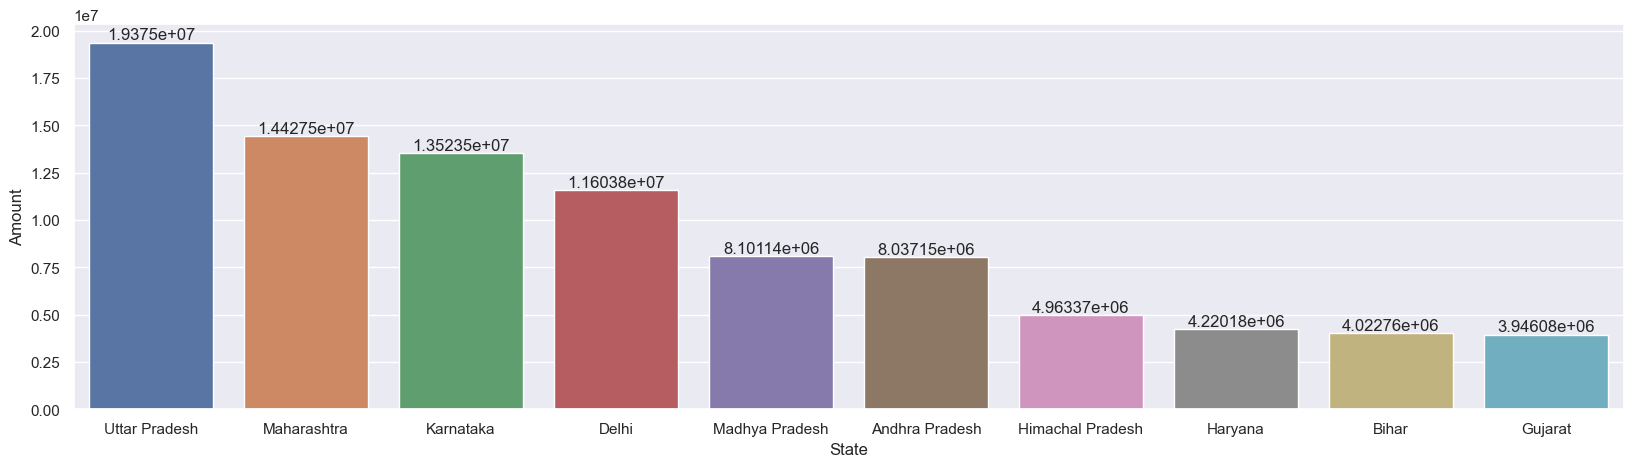

In [23]:
#total amount/sales in top 10 states
amount_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
amount_state_graph = sns.barplot(x = 'State', y = 'Amount', data = amount_state)

for bars in amount_state_graph.containers:
    amount_state_graph.bar_label(bars)

**From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.**

**Marital Status**

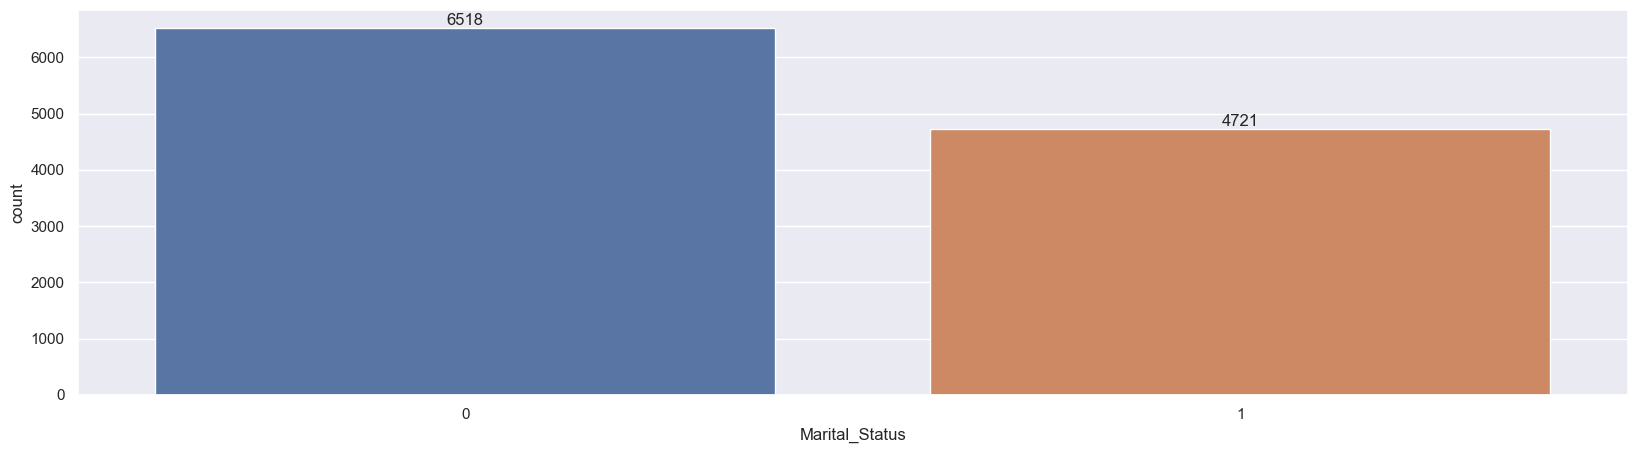

In [24]:
mar = sns.countplot(x = 'Marital_Status', data = df)

sns.set({'figure.figsize': (5,5)})
for bars in mar.containers:
    mar.bar_label(bars)

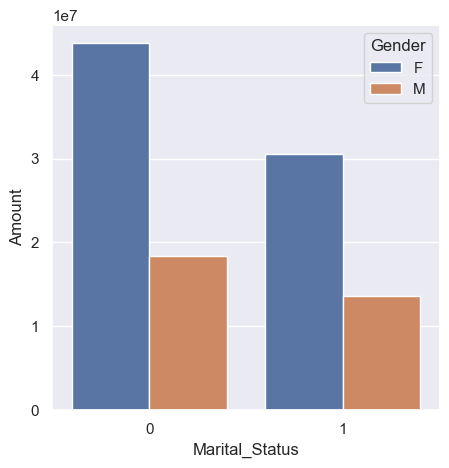

In [25]:
sales_gen_marital = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
xy_age = sns.barplot(x = 'Marital_Status', y = 'Amount', hue ='Gender', data = sales_gen_marital)


**From the above graph it can be said that most number of shopping in terms of Amount is done by married women**

**Product Category**

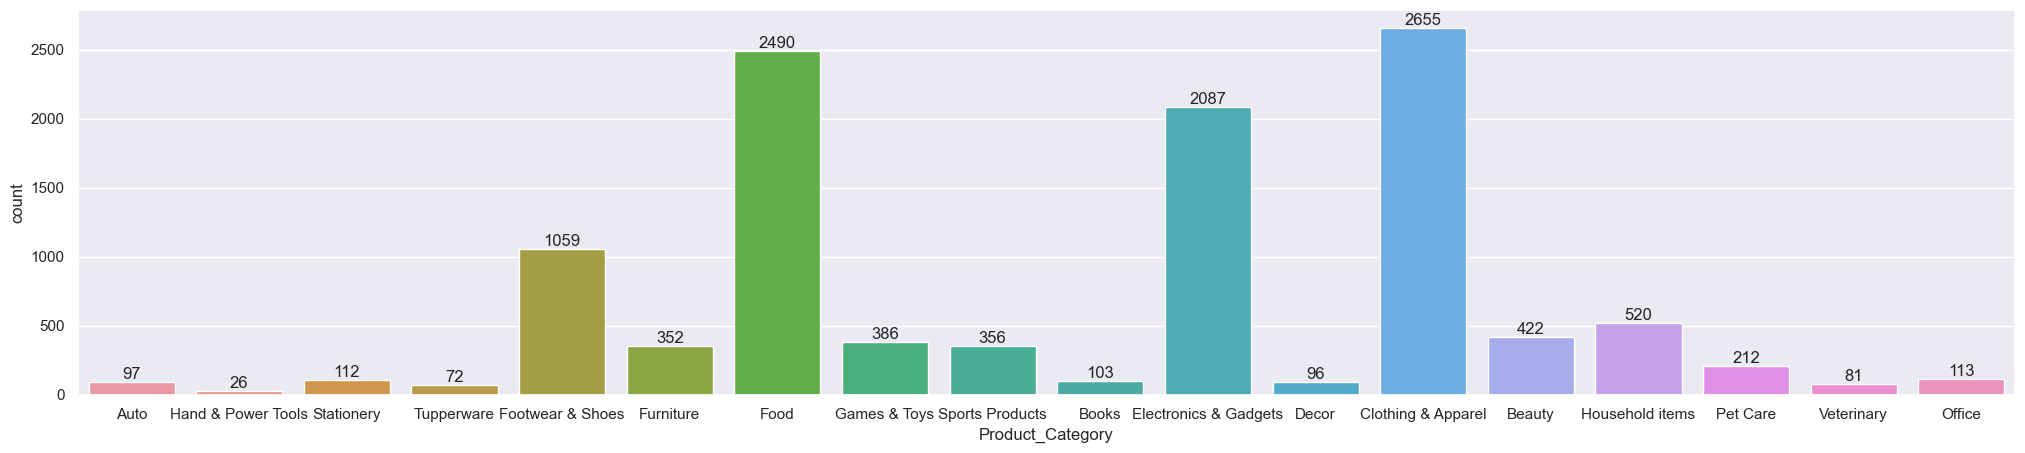

In [26]:
sns.set(rc={'figure.figsize':(25,5)})
prod = sns.countplot(data = df, x = 'Product_Category')

for bars in prod.containers:
    prod.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

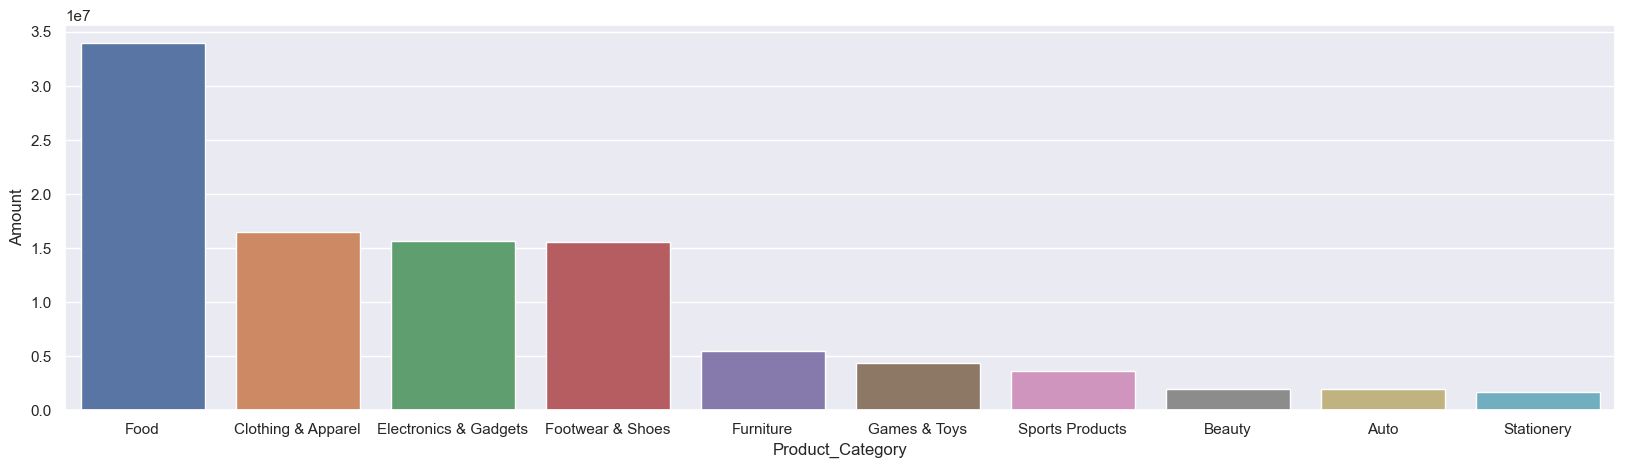

In [27]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

**Most of the sold products are Food, Clothing & Apparel, and Electronics & Gadgets**

<Axes: xlabel='Product_ID', ylabel='Orders'>

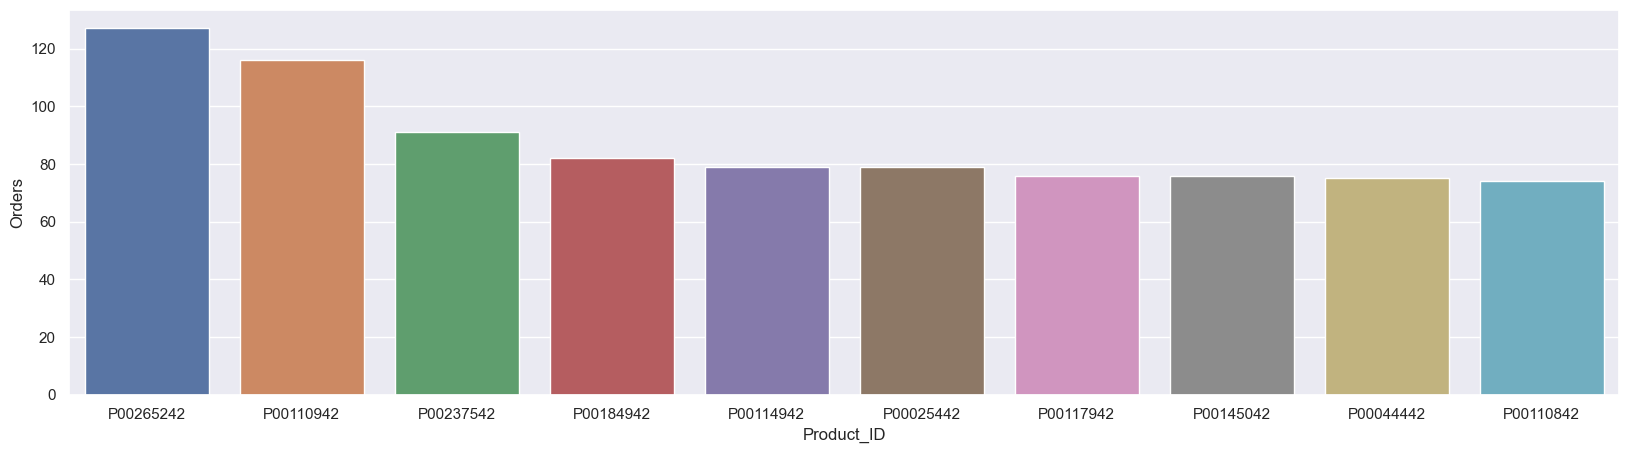

In [30]:
#Based on Product_ID
sales_prodID = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_prodID, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

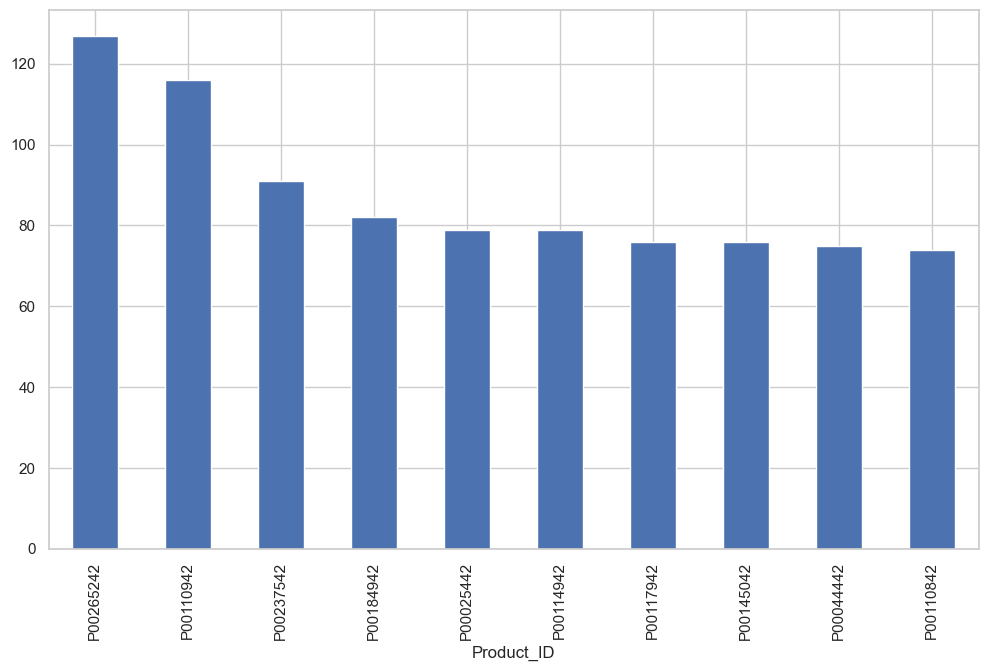

In [35]:
#Top 10 Most Sold Products
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category**